In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
train_data = pd.read_csv("C:\\Users\\User\Desktop\\NTI\\Week 2\\Day 2\\titanic YT Project\\train.csv")
test_data = pd.read_csv("C:\\Users\\User\\Desktop\\NTI\\Week 2\\Day 2\\titanic YT Project\\test.csv")
# Display the first few rows of the training data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#statistics of the training data
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#datatypes information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#cateegorical attributes

<Axes: xlabel='Survived', ylabel='count'>

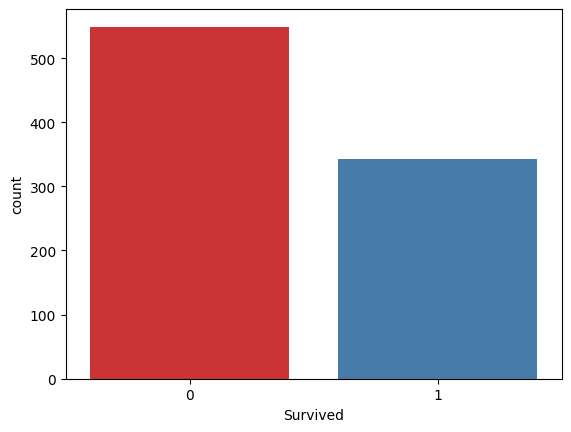

In [8]:
# plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, palette='Set1', x='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

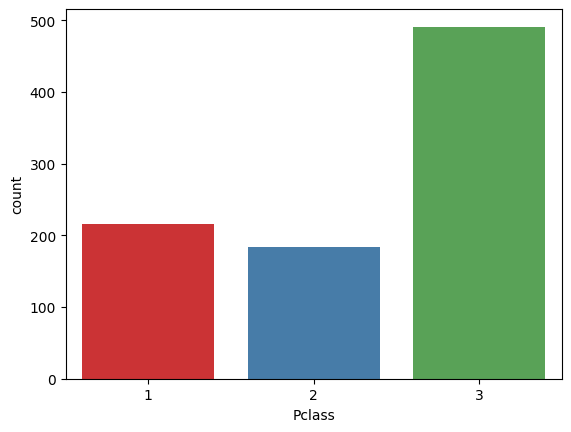

In [9]:
# plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, palette='Set1', x='Pclass')

<Axes: xlabel='Embarked', ylabel='count'>

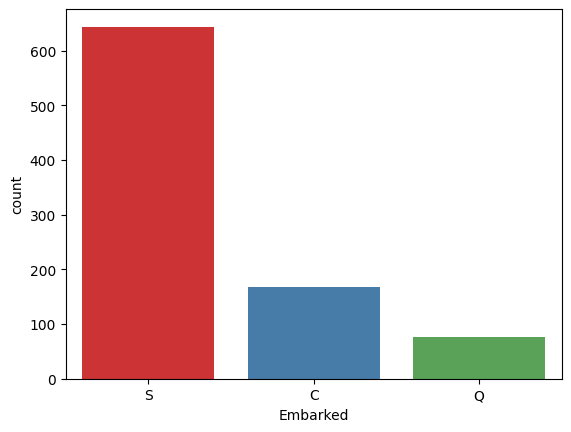

In [10]:
sns.countplot(data=train_data, palette='Set1', x='Embarked')

<Axes: xlabel='Sex', ylabel='count'>

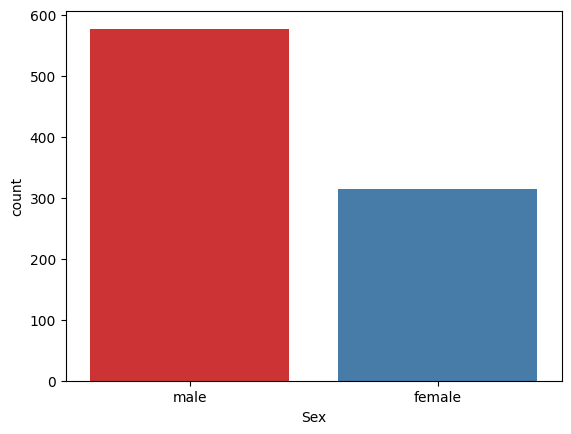

In [11]:
sns.countplot(data=train_data, palette='Set1', x='Sex')

<Axes: xlabel='SibSp', ylabel='count'>

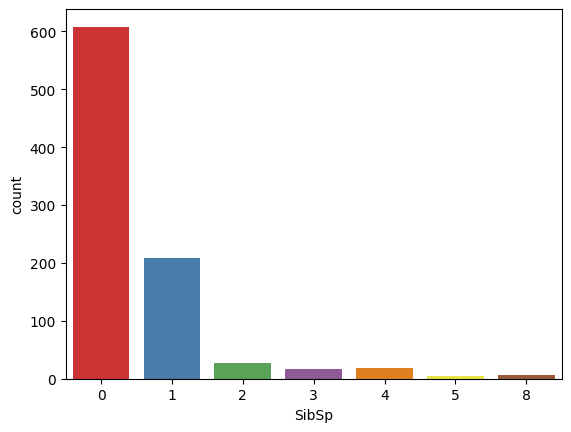

In [12]:
sns.countplot(data=train_data, palette='Set1', x='SibSp')

<Axes: xlabel='Parch', ylabel='count'>

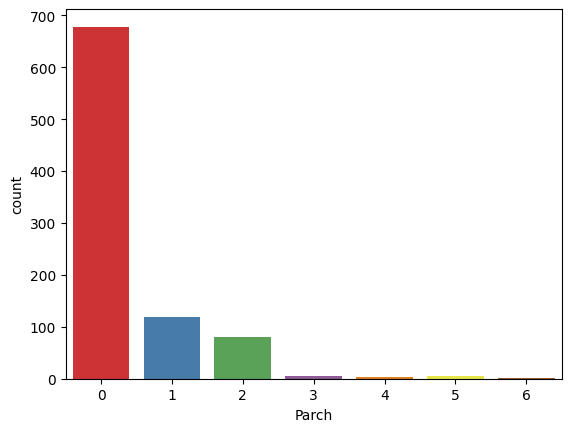

In [13]:
sns.countplot(data=train_data, palette='Set1', x='Parch')

Numercial Attributes

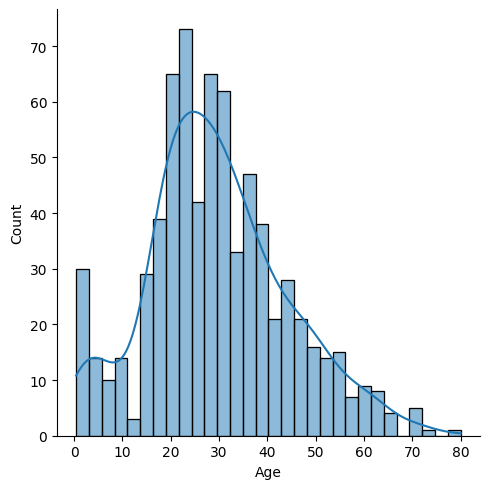

In [14]:
sns.displot(data=train_data, x='Age', kde=True, bins=30)

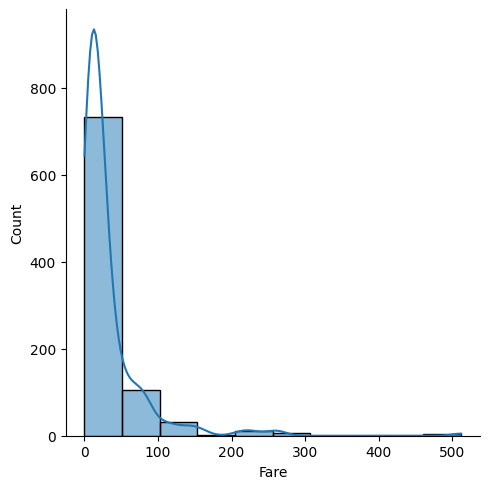

In [15]:
sns.displot(data=train_data, x='Fare', kde=True, bins=10)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

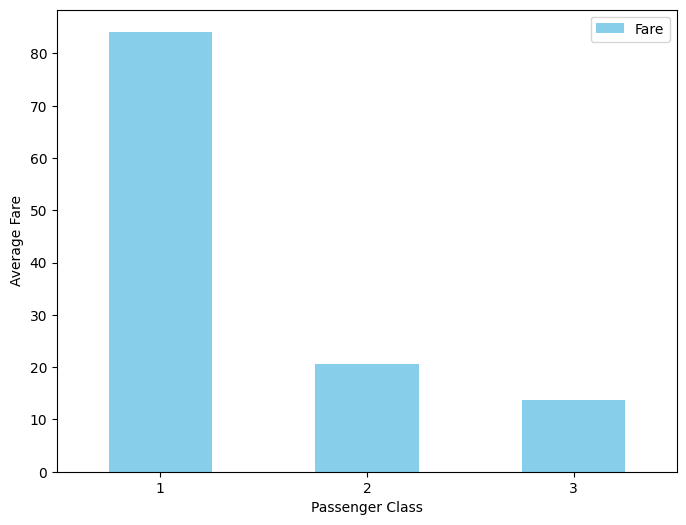

In [16]:
class_fare = train_data.pivot_table(index='Pclass', values='Fare', aggfunc='mean')
class_fare.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

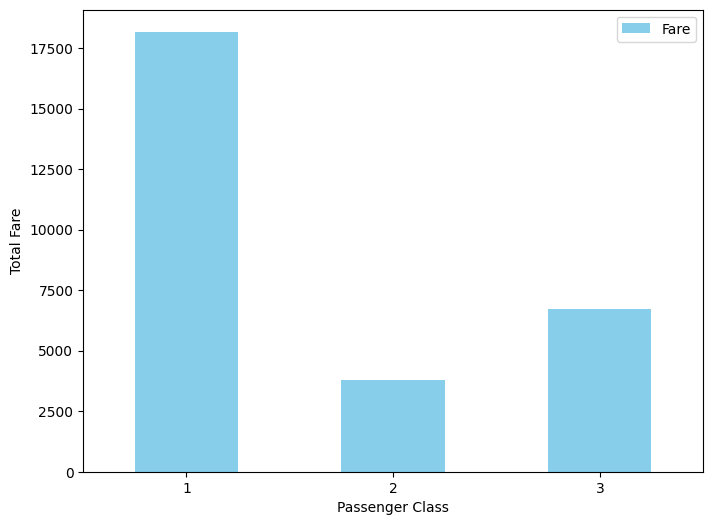

In [17]:
class_fare = train_data.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.xlabel('Passenger Class')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)

Data Pre-Processing

In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
# Count null values in each column
print("Null values per column:")
print(train_data.isnull().sum())

Null values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
#
train_data=train_data.drop(['Cabin'], axis=1)

In [22]:
train_data['Age'].mean()

np.float64(29.69911764705882)

In [23]:
# Fill Missing Values For Numerical Columns
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())


In [24]:
train_data['Embarked'].mode()[0]

'S'

In [25]:
# Fill Missing Values For Categorical Columns

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [26]:
print("Null values per column:")
print(train_data.isnull().sum())

Null values per column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Do families sink or swim together

In [27]:
# Create a family size variable including the passenger themselves
train_data['Fsize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Extract surname from the Name column
train_data['Surname'] = train_data['Name'].apply(lambda x: x.split(',')[0])

# Create a family variable
train_data['Family'] = train_data['Surname'] + '_' + train_data['Fsize'].astype(str)

What does our family size variable look like? To help us understand how it may relate to survival, let’s plot it among the training data.

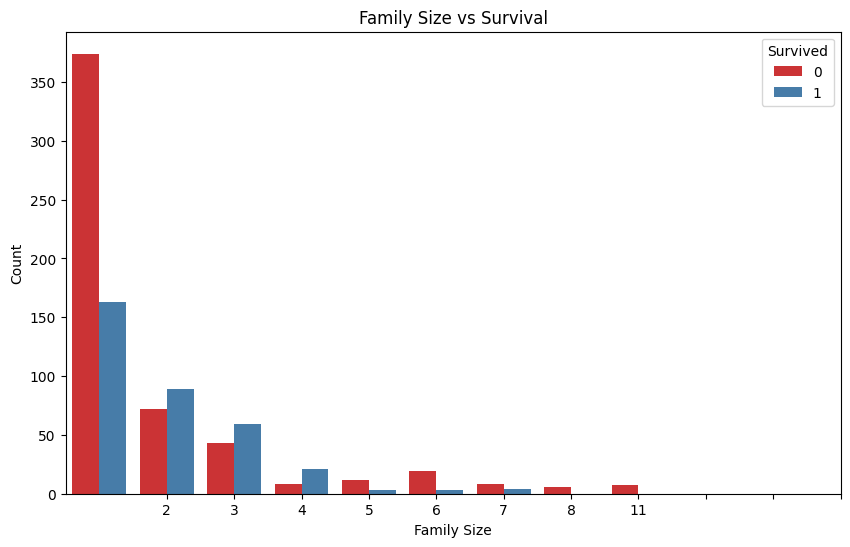

In [28]:
# Visualize the relationship between family size and survival using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Fsize', hue='Survived', palette='Set1')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Family Size vs Survival')
plt.xticks(ticks=range(train_data['Fsize'].min(), train_data['Fsize'].max()+1))
plt.show()

Create the column child, and indicate whether child or adult

In [29]:
# Create 'Child' column: 'Child' if Age < 18, else 'Adult'
train_data['Child'] = np.where(train_data['Age'] < 18, 'Child', 'Adult')

# Show counts of Child/Adult vs Survived
print(pd.crosstab(train_data['Child'], train_data['Survived']))

Survived    0    1
Child             
Adult     497  281
Child      52   61


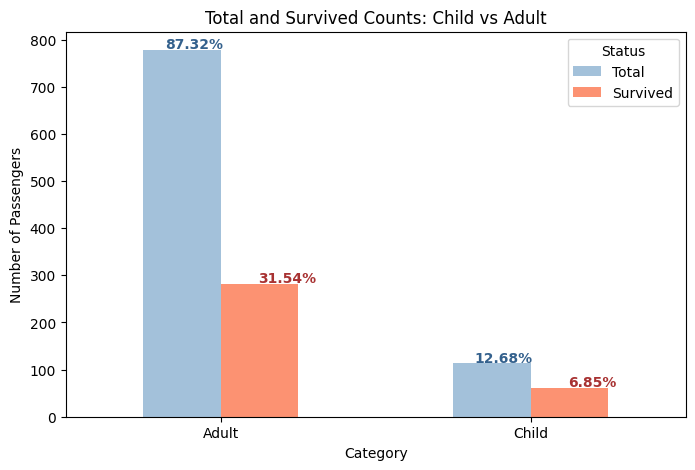

In [30]:
# Create a grouped bar plot for total and survived counts of Child and Adult, with percentages

total_counts = train_data['Child'].value_counts()
survived_counts = train_data[train_data['Survived'] == 1]['Child'].value_counts()
total_passengers = len(train_data)

# Prepare DataFrame for plotting
plot_df = pd.DataFrame({
    'Total': total_counts,
    'Survived': survived_counts
}).fillna(0)

plot_df = plot_df.astype(int)

# Calculate percentages
plot_df['Total_pct'] = (plot_df['Total'] / total_passengers * 100).round(2)
plot_df['Survived_pct'] = (plot_df['Survived'] / total_passengers * 100).round(2)

# Plot
ax = plot_df[['Total', 'Survived']].plot(kind='bar', figsize=(8, 5), color=['#a3c1da', '#fc9272'])
plt.title('Total and Survived Counts: Child vs Adult')
plt.xlabel('Category')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Status')

# Annotate bars with percentages
for i, (total, survived, total_pct, survived_pct) in enumerate(zip(plot_df['Total'], plot_df['Survived'], plot_df['Total_pct'], plot_df['Survived_pct'])):
    ax.text(i - 0.18, total + 3, f'{total_pct}%', color='#34618d', fontweight='bold')
    ax.text(i + 0.12, survived + 3, f'{survived_pct}%', color='#a83232', fontweight='bold')

plt.show()

All columns in the dataset:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Fsize', 'Surname', 'Family', 'Child']

Removing columns: ['Name', 'Surname', 'Child']
Remaining columns after removal: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Fsize', 'Family']


Missing values:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Fsize          0
Family         0
dtype: int64

Categorical columns to encode: ['Sex', 'Ticket', 'Embarked', 'Family']

Features shape: (891, 11)
Target shape: (891,)
Feature columns: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Fsize', 'Family']

Training the model...
Model Accuracy: 0.8324

Top 10 Most Important Features:
        Feature  Importance
2           Sex    0.306154
6        Ti

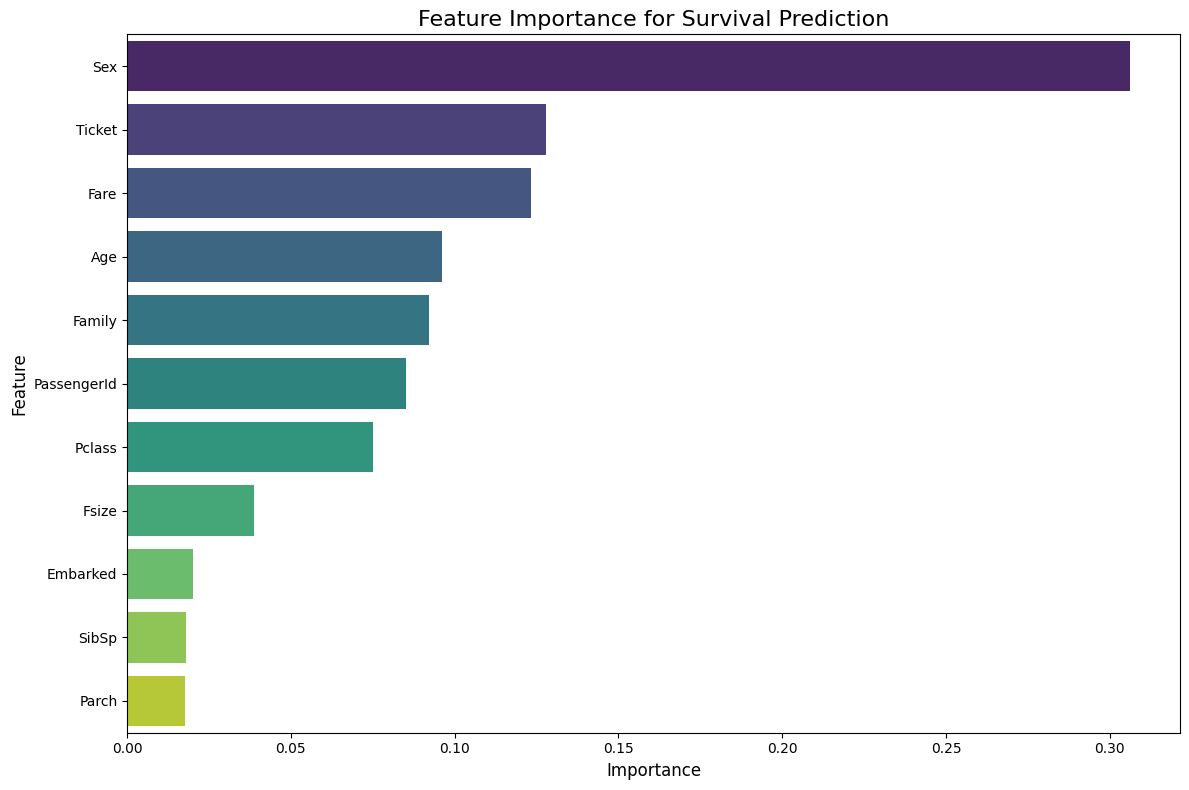


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Encoding mappings (first 3 categorical columns):

Sex:
  1 -> male
  0 -> female

Ticket:
  523 -> A/5 21171
  596 -> PC 17599
  669 -> STON/O2. 3101282
  49 -> 113803
  472 -> 373450
  275 -> 330877
  85 -> 17463
  395 -> 349909
  344 -> 347742
  132 -> 237736

Embarked:
  2 -> S
  0 -> C
  1 -> Q


In [ ]:

# Assuming you have your data loaded as 'train_data'
# Let's first examine the data types

# Create a copy to work with
data = train_data.copy()

# First, let's see all column names
print("All columns in the dataset:")
print(list(data.columns))
print()

# Remove unwanted columns first (before encoding)
# Try different possible column names
columns_to_remove = ['name', 'surname', 'child', 'Name', 'Surname', 'Child', 
                    'NAME', 'SURNAME', 'CHILD', 'Name_x', 'Name_y']
available_columns_to_remove = [col for col in columns_to_remove if col in data.columns]
print(f"Removing columns: {available_columns_to_remove}")
data = data.drop(columns=available_columns_to_remove)

print(f"Remaining columns after removal: {list(data.columns)}")
print()

# Handle missing values
print(f"\nMissing values:\n{data.isnull().sum()}")

# Fill missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna('Unknown')
    else:
        data[col] = data[col].fillna(data[col].median())

# Encode categorical variables
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Remove 'Survived' from categorical columns if it exists
if 'Survived' in categorical_columns:
    categorical_columns.remove('Survived')

print(f"\nCategorical columns to encode: {categorical_columns}")

# Encode categorical variables
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Prepare features and target
X = data.drop(columns=['Survived'])
y = data['Survived']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

print("\nTraining the model...")
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Display top features
print("\nTop 10 Most Important Features:")
print(feat_imp.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
top_features = feat_imp.head(15)
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Feature Importance for Survival Prediction', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Optional: Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show what the encoded values represent (for the first few categorical columns)
print("\nEncoding mappings (first 3 categorical columns):")
for i, col in enumerate(categorical_columns[:3]):
    if col in label_encoders:
        le = label_encoders[col]
        unique_values = data[col].unique()[:10]  # Show first 10 unique values
        print(f"\n{col}:")
        for val in unique_values:
            original_val = le.inverse_transform([val])[0]
            print(f"  {val} -> {original_val}")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

Cleaned Data

In [ ]:
train_data.to_csv("C:\\Users\\User\\Desktop\\NTI\\Week 2\\Day 2\\titanic YT Project\\cleaned_train_data.csv", index=False)

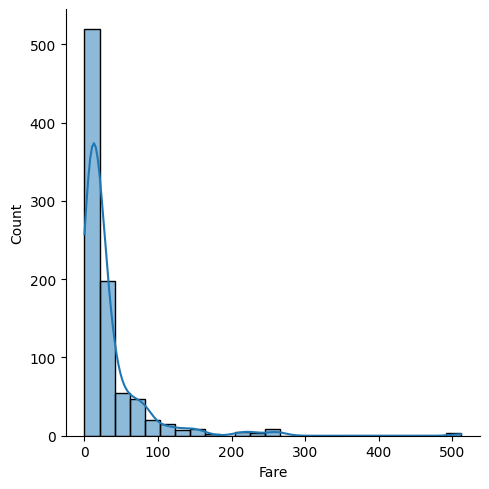

In [ ]:
sns.displot(data=train_data, x='Fare', kde=True, bins=25)

In [ ]:
train_data['Fare'] = np.log(train_data['Fare']+1)


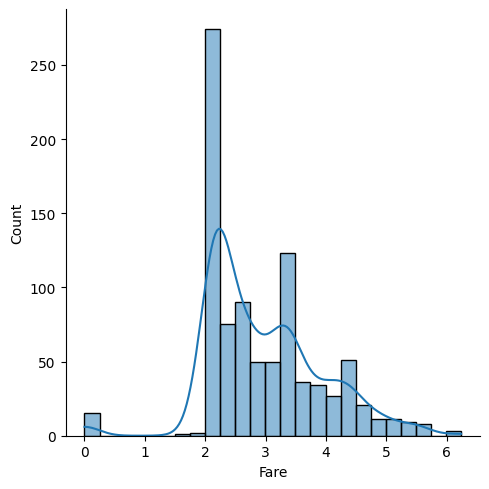

In [ ]:
sns.displot(data=train_data, x='Fare', kde=True, bins=25)

Correlation Matrix

<Axes: >

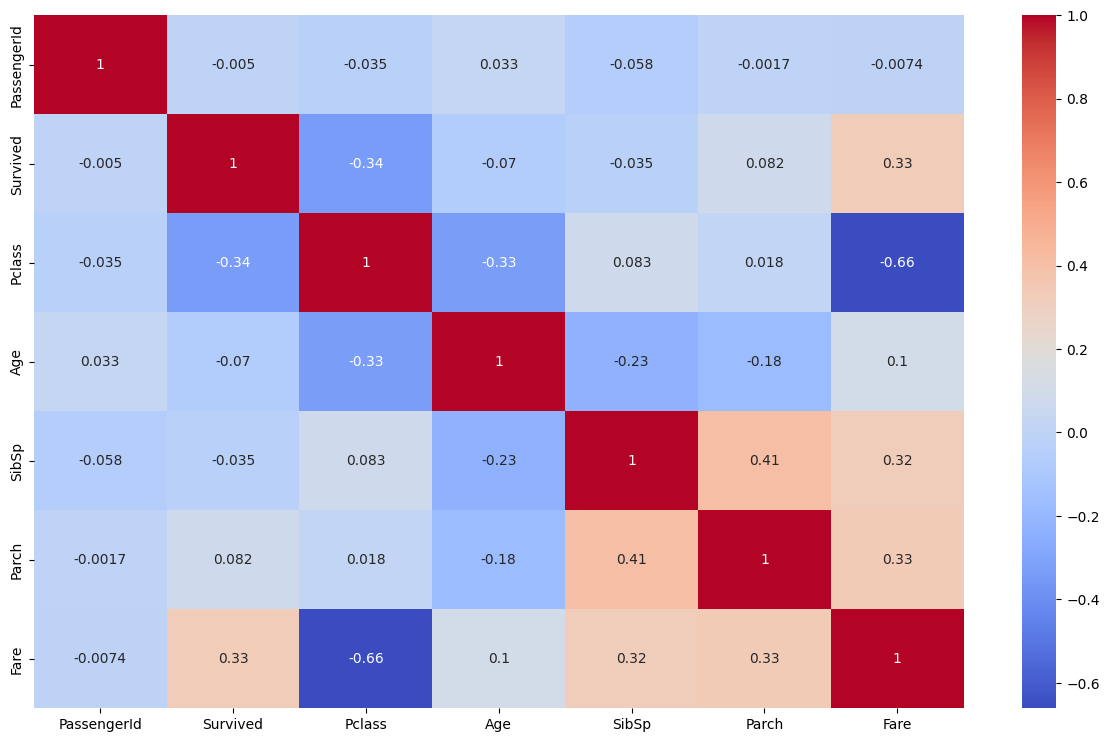

In [ ]:
corr = train_data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
## drop unnecessary columns
train_data = train_data.drop(columns=['Name', 'Ticket'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,2.110213,S
1,2,1,1,female,38.0,1,0,4.280593,C
2,3,1,3,female,26.0,0,0,2.188856,S
3,4,1,1,female,35.0,1,0,3.990834,S
4,5,0,3,male,35.0,0,0,2.202765,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Make sure train_data is loaded before running this cell

cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    train_data[col] = le.fit_transform(train_data[col])
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


In [ ]:
train_len = 891  # Number of rows in the original training set
train = train_data.iloc[:train_len, :]
test = test_data.iloc[train_len:, :]
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


In [ ]:
# input split
X = train_data.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train_data['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [ ]:
train_data = train_data.drop(columns=['Cabin'], axis=1, errors='ignore')

Model Training

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# Use X (no NaN values) for classification
def classify_with_filled(model):
	from sklearn.model_selection import train_test_split, cross_val_score
	x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
	model.fit(x_train, y_train)
	print('Accuracy:', model.score(x_test, y_test))
	score = cross_val_score(model, X, y, cv=5)
	print('CV Score:', np.mean(score))

classify_with_filled(model)

Accuracy: 0.8071748878923767
CV Score: 0.7833971502102819


Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.726457399103139
CV Score: 0.7688280710564309


Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8026905829596412
CV Score: 0.8070052099679869


Extra Trees:    

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.8026905829596412
CV Score: 0.7968865733475614


XGBoost:

In [ ]:
%pip install xgboost

from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Note: you may need to restart the kernel to use updated packages.
Accuracy: 0.7802690582959642
CV Score: 0.8159751428033394


LightGBM:

In [ ]:
%pip install lightgbm

from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

Note: you may need to restart the kernel to use updated packages.
[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

CatBoost:

In [ ]:
%pip install catboost

from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Note: you may need to restart the kernel to use updated packages.
Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


Among all the models, LightGBM shows the highest CV score.
Complete Model Training with Full Train Data

In [ ]:
model = LGBMClassifier()
model.fit(X, y)
test_data.head()

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# input split for test data
# 'Survived' column does not exist in test_data, so remove it from the drop list
X_test = test_data.drop(columns=['PassengerId', 'Name'])
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# input split for test data
# input split for test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
